# Heart Failure Prediction

Import the required libraries :

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the data-set
df =  pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")

# Data Exploration

In [ ]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [ ]:
df.shape


(299, 13)

# Data Cleaning

In [ ]:
df.duplicated().sum()

0

In [ ]:
# check for missing value
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

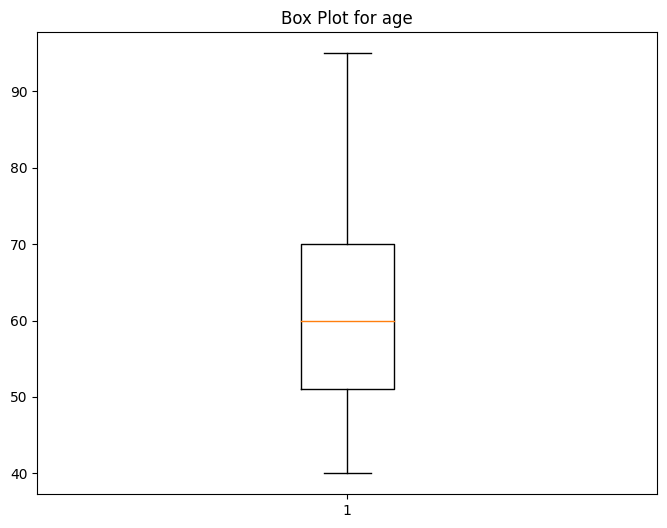

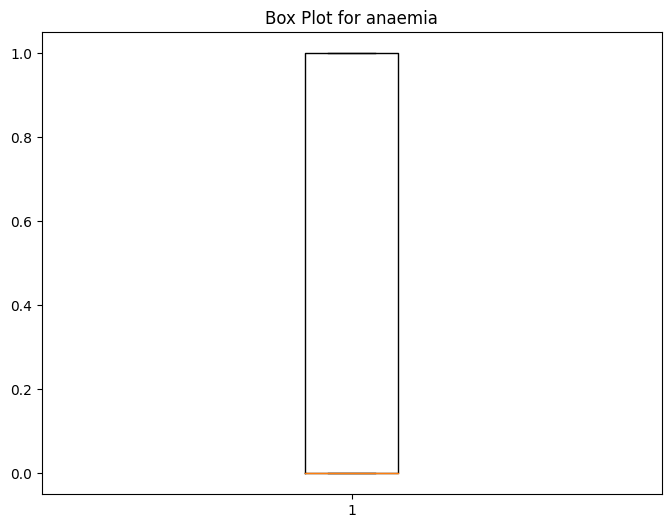

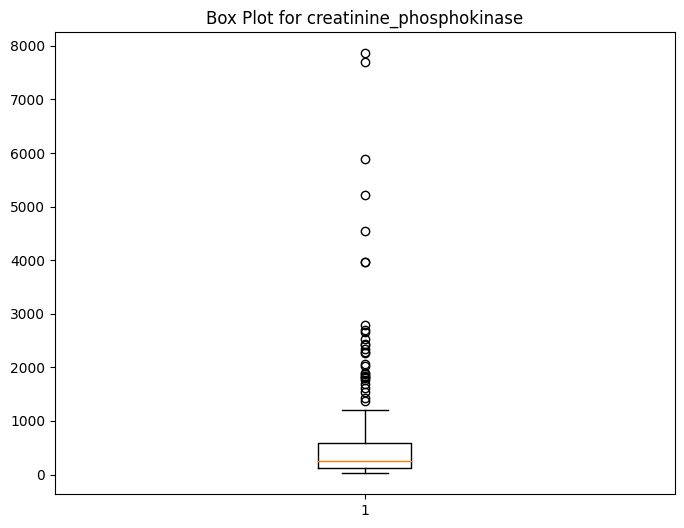

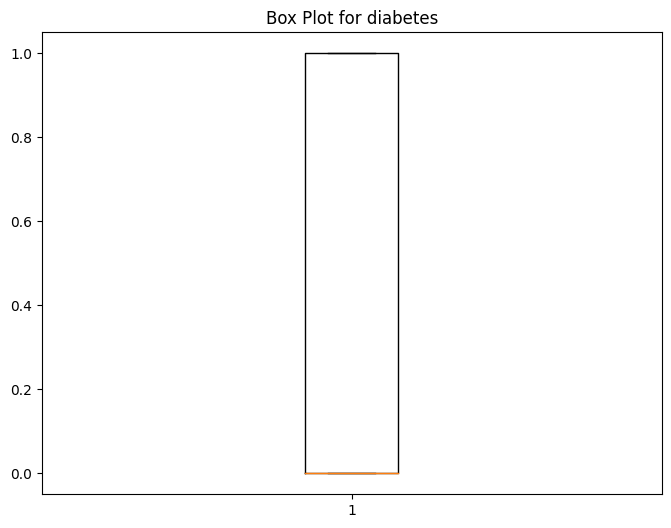

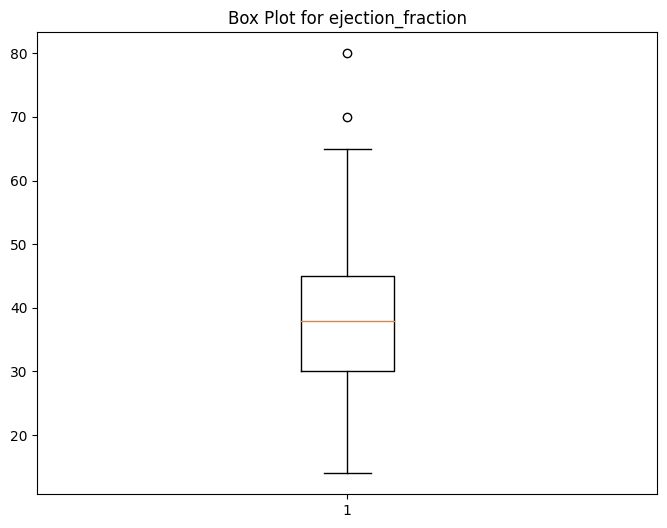

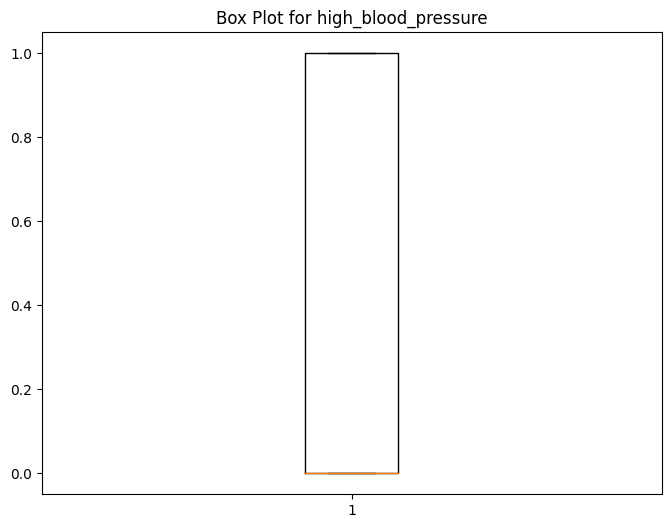

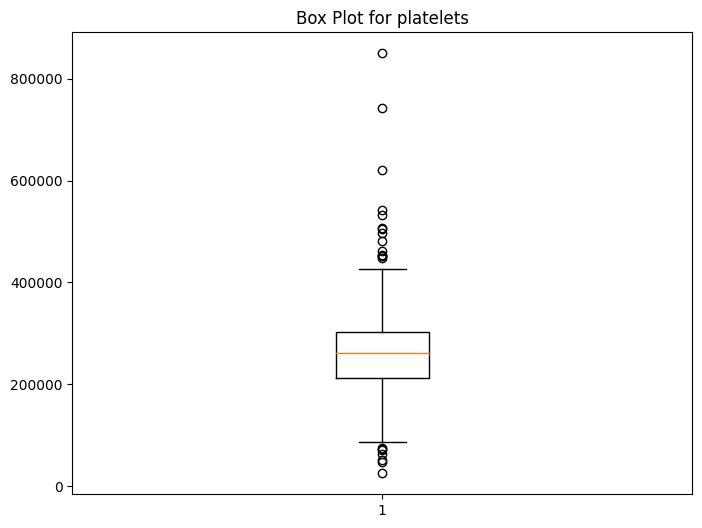

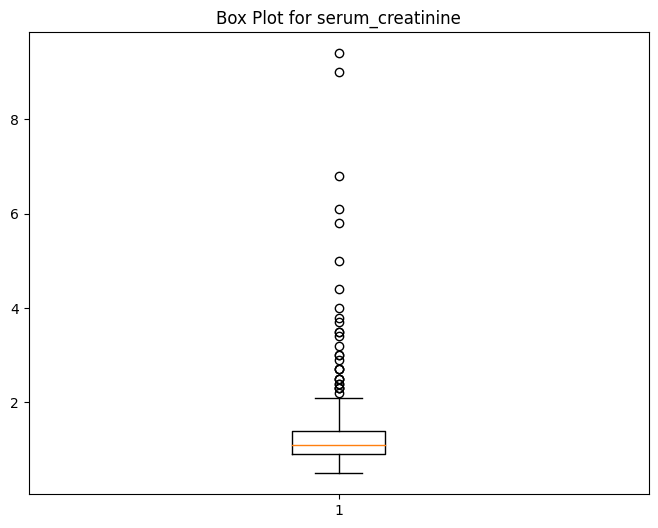

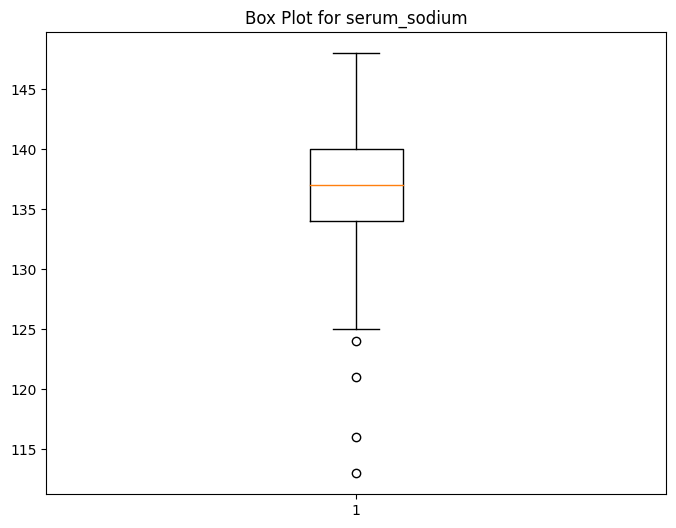

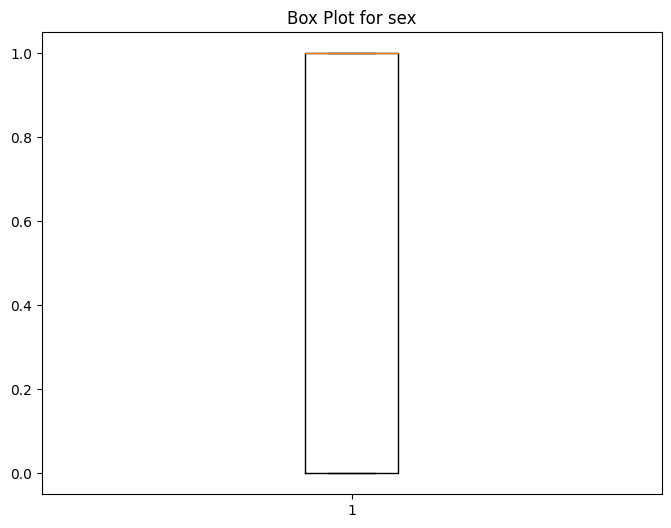

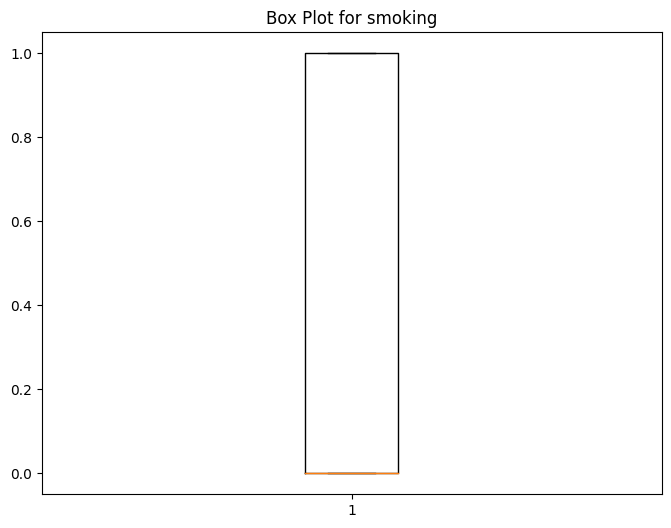

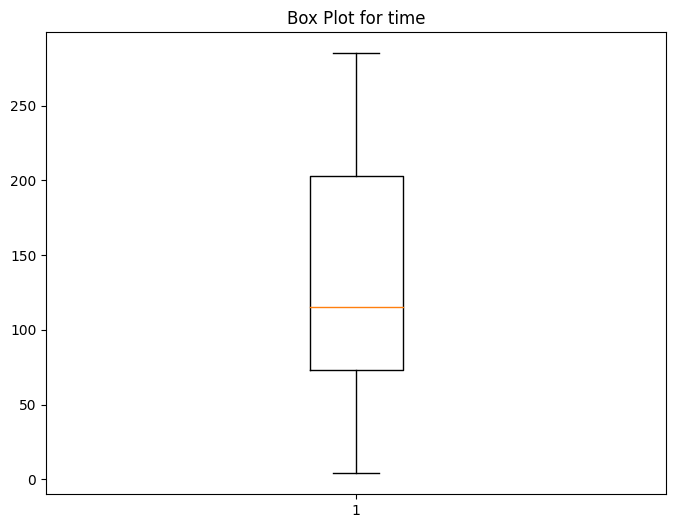

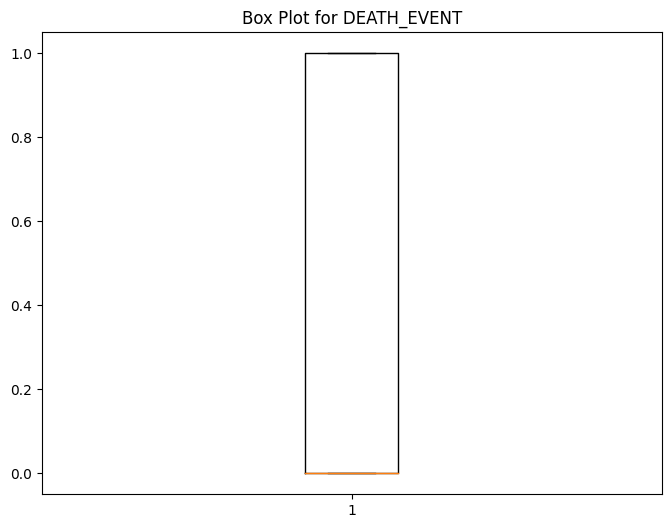

In [ ]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [ ]:
def remove_outliers(df):
    for col in df.select_dtypes(include='number').columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers=(df[col] < lower_bound ) | (df[col] > upper_bound)
        df=df[~outliers]
    return df
# Remove outliers
df = remove_outliers(df)

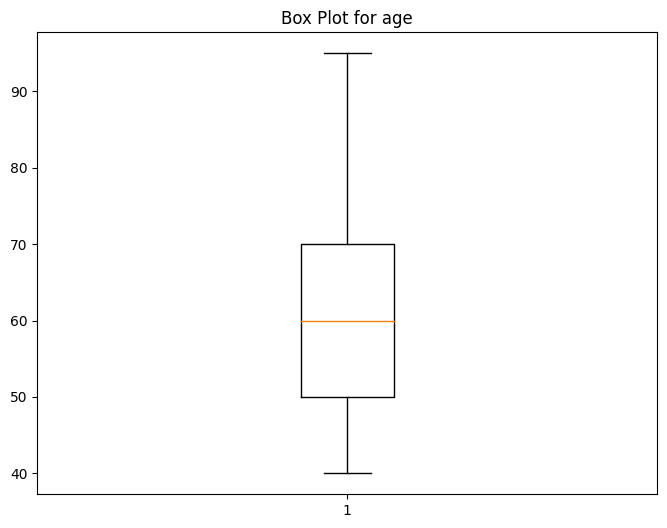

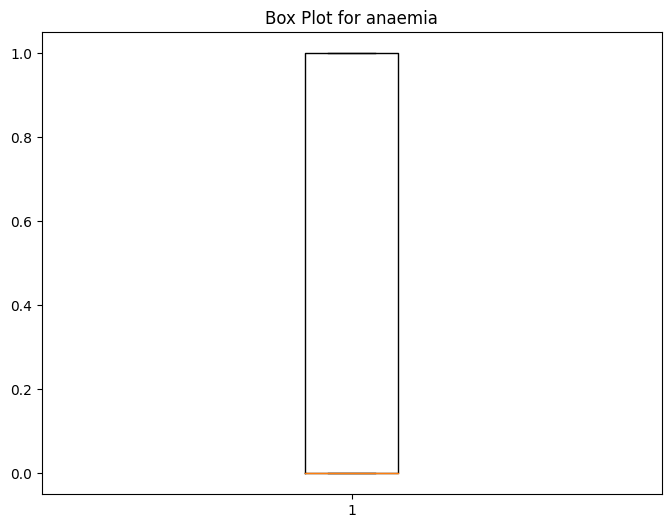

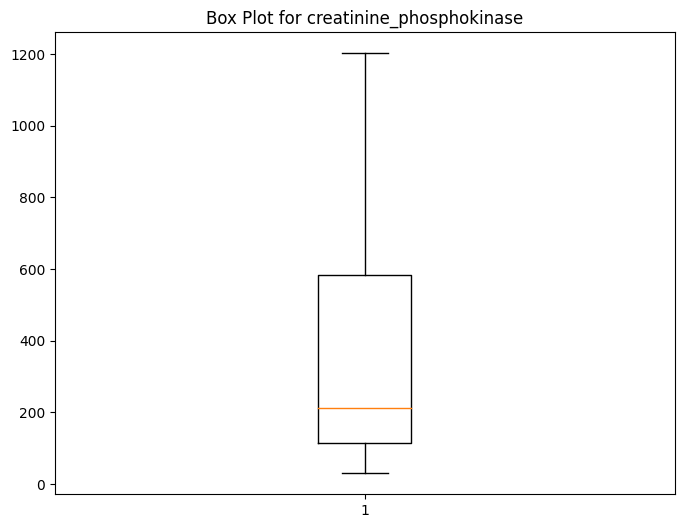

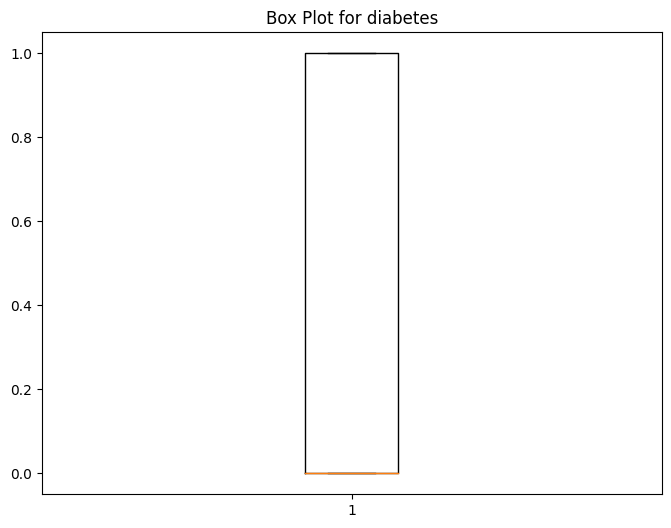

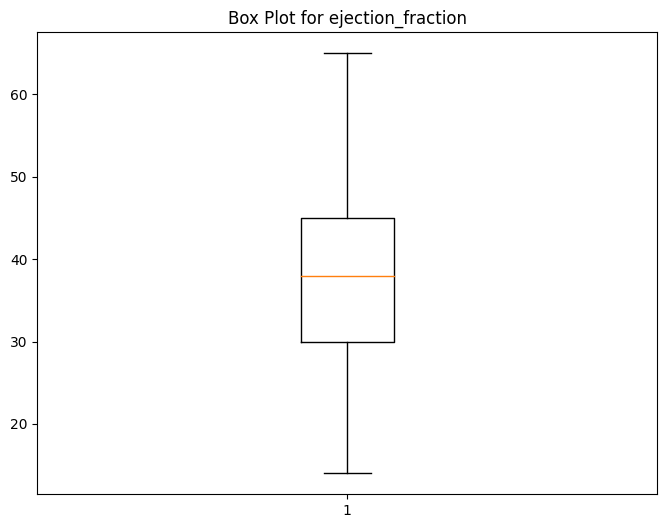

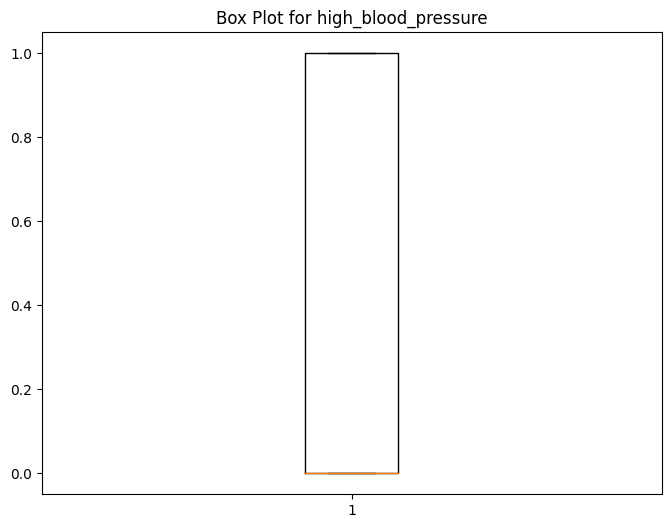

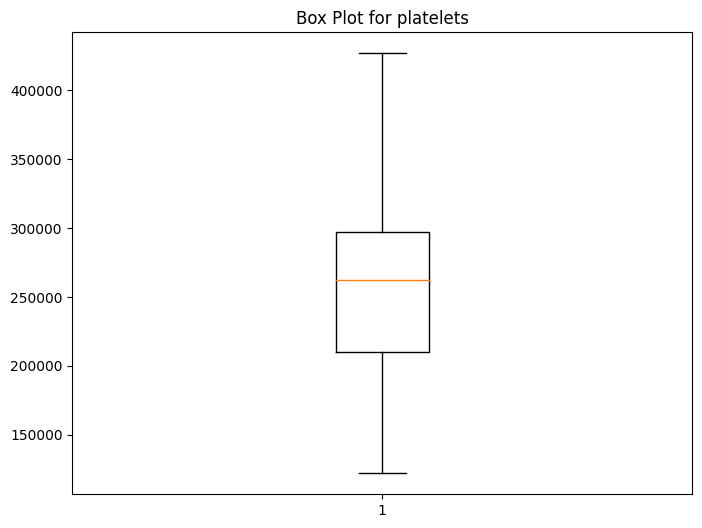

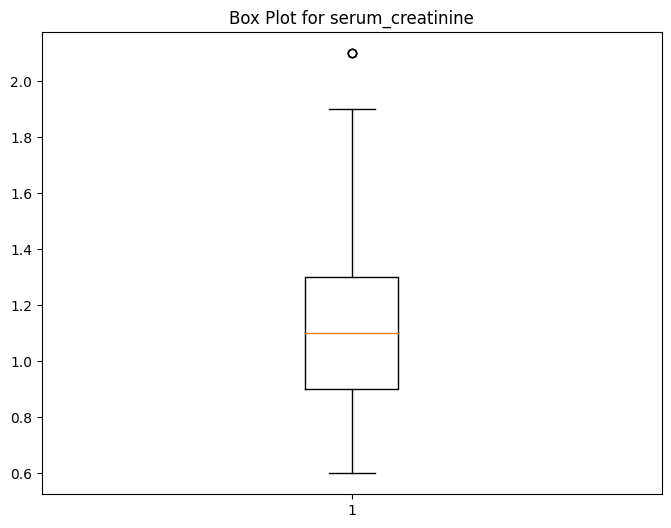

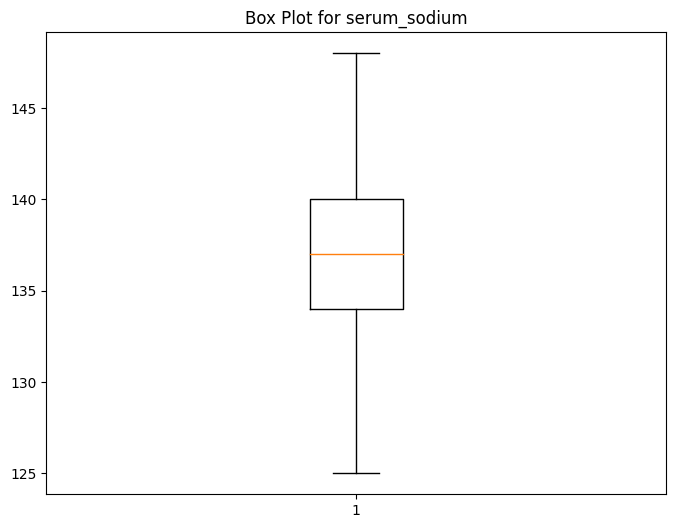

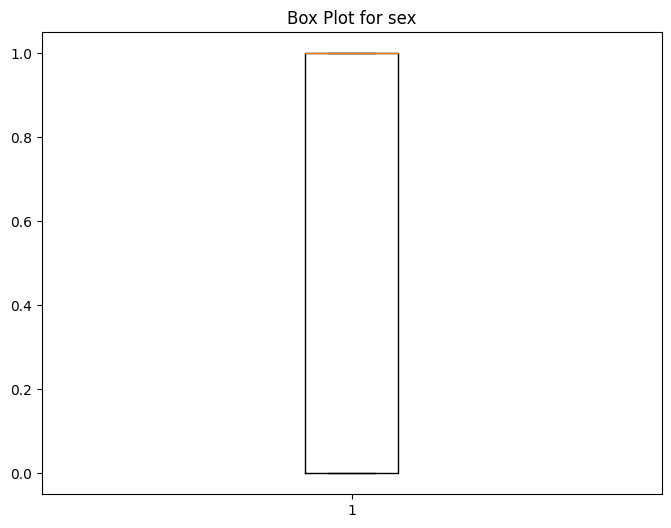

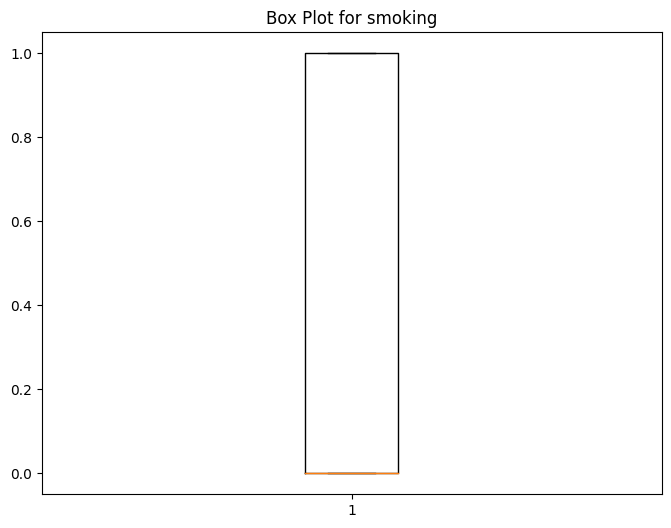

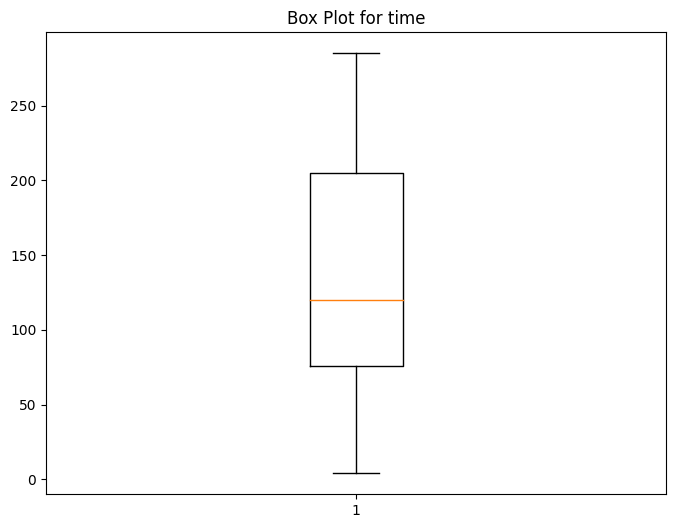

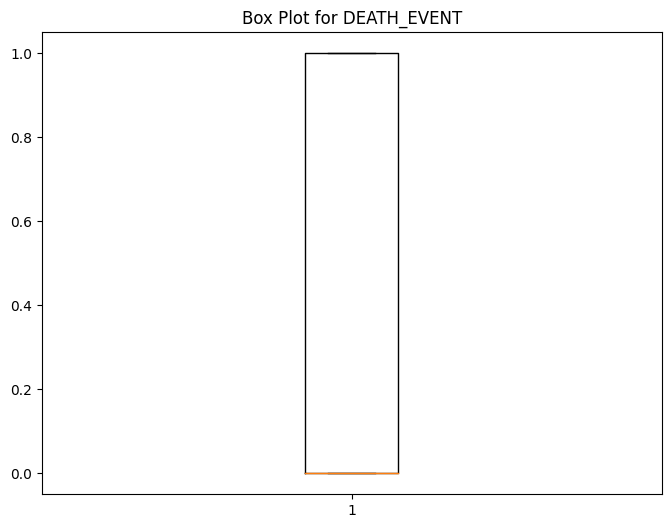

In [ ]:
for col in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f'Box Plot for {col}')
    plt.show()

In [ ]:
df.shape

(224, 13)

In [ ]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1
2,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1


# DATA ANALYSIS

In [ ]:
#use plotly graph
#age distribution graph
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()

The AGE DISTRIBUTION graph shows the frequency distribution of ages in the dataset. The x-axis represents age, and the y-axis represents the count of individuals in each age group. The bars are colored in a shade of orange (#e8ab60).

The graph shows that the majority of individuals in the dataset are between 40 and 70 years old. There is a peak in the distribution around 60 years old, indicating that this is the most common age group in the dataset.

The graph also shows that there are relatively few individuals under the age of 40 or over the age of 90. This suggests that the dataset may not be representative of the entire population, as it is skewed towards middle-aged and older adults.

Overall, the graph provides a useful visual representation of the age distribution in the dataset, which can be helpful for understanding the characteristics of the population bei

In [ ]:
#graph for DEATH_EVENT vs Age analysis

import plotly.express as px
fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of AGE Vs DEATH_EVENT",
                   labels={"age": "AGE"},

                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

The graph shows the distribution of ages for individuals who experienced a death event (DEATH_EVENT = 1) and those who did not (DEATH_EVENT = 0). The x-axis represents age, and the y-axis represents the count of individuals in each age group. The bars are colored purple for individuals who experienced a death event and medium purple for those who did not.

The graph shows that the majority of individuals who experienced a death event were over the age of 60. There is a peak in the distribution around 70 years old, indicating that this is the most common age for death events.

The graph also shows that there are relatively few individuals under the age of 40 who experienced a death event. This suggests that the risk of death from heart failure is lower for younger individuals.

Overall, the graph provides evidence that the risk of death from heart failure increases with age. This is consistent with the known risk factors for heart failure, which include older age, high blood pressure, and diabetes.

In [ ]:
#graph for DEATH_EVENT vs smoking analysis

import plotly.express as px
fig = px.histogram(df, x='smoking', y='DEATH_EVENT')
fig.update_layout(
    title_text='ANALYSIS OF DEATH EVENT V/S SMOKING',
    xaxis_title_text='SMOKING',
    yaxis_title_text='DEATH-EVENT',
    bargap=0.02, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }

)

fig.show()

The graph shows the distribution of smoking status for individuals who experienced a death event (DEATH_EVENT = 1) and those who did not (DEATH_EVENT = 0). The x-axis represents smoking status (0 for non-smokers, 1 for smokers), and the y-axis represents the count of individuals in each group. The bars are colored purple for individuals who experienced a death event and medium purple for those who did not.

The graph shows that a higher proportion of smokers experienced a death event compared to non-smokers. This suggests that smoking is a risk factor for death from heart failure.

The difference in the proportion of death events between smokers and non-smokers is statistically significant. This means that the observed difference is unlikely to be due to chance.

Overall, the graph provides evidence that smoking is associated with an increased risk of death from heart failure. This is consistent with the known health risks of smoking, which include an increased risk of heart disease, stroke, and cancer.

In [ ]:
#graph for DEATH_EVENT vs time analysis

import plotly.express as px
fig = px.histogram(df, x='time', y='DEATH_EVENT')
fig.update_layout(
    title_text='ANALYSIS OF DEATH EVENT V/S TIME',
    xaxis_title_text='TIME',
    yaxis_title_text='DEATH-EVENT',
    bargap=0.02, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }

)

fig.show()

 The graph shows that the majority of individuals who experienced a death event died within the first 100 days of follow-up. There is a peak in the distribution around 50 days, indicating that this is the most common time to death event.

The graph also shows that there are relatively few individuals who experienced a death event after 200 days of follow-up. This suggests that the risk of death from heart failure decreases over time.

Overall, the graph provides evidence that the risk of death from heart failure is highest in the early stages of follow-up. This is consistent with the known natural history of heart failure, which is characterized by a progressive decline in heart function over time.

In [ ]:
# Distribution of creatinine_phosphokinase

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['creatinine_phosphokinase'],
    xbins=dict( # bins used for histogram
        start=23,
        end=582,
        size=15
    ),
    marker_color='#FE6F5E',
    opacity=1
))

fig.update_layout(
    title_text='CREATININE PHOSPHOKINASE DISTRIBUTION',
    xaxis_title_text='CREATININE PHOSPHOKINASE',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }

)

fig.show()

In [ ]:
#DEATH-EVENT V/S CREATININE PHOSPHOKINASE
import plotly.express as px
fig = px.histogram(df, x="creatinine_phosphokinase", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of CREATININE PHOSPHOKINASE Vs DEATH_EVENT",
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"},

                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# Distribution of ejection_fraction

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='#A7F432',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }

)

fig.show()

In [ ]:
# Distribution of platelets

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['platelets'],
    xbins=dict( # bins used for histogram
        start=25000,
        end=300000,
        size=5000
    ),
    marker_color='#50BFE6',
    opacity=1
))

fig.update_layout(
    title_text='PLATELETS DISTRIBUTION',
    xaxis_title_text='PLATELETS',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }

)

fig.show()

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="platelets", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of PLATELETS Vs DEATH_EVENT",
                   labels={"platelets": "PLATELETS"},

                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# Distribution of serum_creatinine

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['serum_creatinine'],
    xbins=dict( # bins used for histogram
        start=0.5,
        end=9.4,
        size=0.2
    ),
    marker_color='#E77200',
    opacity=1
))

fig.update_layout(
    title_text='SERUM CREATININE DISTRIBUTION',
    xaxis_title_text='SERUM CREATININE',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="serum_creatinine", color="DEATH_EVENT", marginal="violin", hover_data=df.columns,
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT",
                   labels={"serum_creatinine": "SERUM CREATININE"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
# Distribution of serum_sodium

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['serum_sodium'],
    xbins=dict( # bins used for histogram
        start=113,
        end=148,
        size=1
    ),
    marker_color='#AAF0D1',
    opacity=1
))

fig.update_layout(
    title_text='SERUM SODIUM DISTRIBUTION',
    xaxis_title_text='SERUM SODIUM',
    yaxis_title_text='COUNT',
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }
)

fig.show()


In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="serum_sodium", color="DEATH_EVENT", marginal="violin",hover_data=df.columns,
                   title ="Distribution of SERUM SODIUM Vs DEATH_EVENT",
                   labels={"serum_sodium": "SERUM SODIUM"},
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
fig.show()

In [ ]:
#graph for AGE vs anaemia analysis

import plotly.express as px
fig = px.histogram(df, x='age', y='anaemia')
fig.update_layout(
    title_text='AGE V/S ANAEMIA',
    xaxis_title_text='AGE',
    yaxis_title_text='ANAEMIA',
    bargap=0.02, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }

)

fig.show()

In [ ]:
#graph for AGE vs anaemia analysis

import plotly.express as px
fig = px.histogram(df, x='age', y='diabetes')
fig.update_layout(
    title_text='AGE V/S DIABETES',
    xaxis_title_text='AGE',
    yaxis_title_text='DIABETES',
    bargap=0.02, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }

)

fig.show()

In [ ]:
#graph for AGE vs anaemia analysis

import plotly.express as px
fig = px.histogram(df, x='age', y='high_blood_pressure')
fig.update_layout(
    title_text='AGE V/S BLOOD-PRESSURE',
    xaxis_title_text='AGE',
    yaxis_title_text='BLOOD-PRESSURE',
    bargap=0.02, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }

)

fig.show()

In [ ]:
#graph for AGE vs smoking analysis

import plotly.express as px
fig = px.histogram(df, x='age', y='smoking')
fig.update_layout(
    title_text='AGE V/S SMOKING',
    xaxis_title_text='AGE',
    yaxis_title_text='SMOKING',
    bargap=0.02, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False }

)

fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["DEATH_EVENT"]==0) & (df["sex"]==1)]
d2 =df[(df["DEATH_EVENT"]==1) & (df["sex"]==1)]
d3 =df[(df["DEATH_EVENT"]==0) & (df["sex"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["sex"]==0)]

label1 = ["Male","Female"]
label2 = ['Male - Survived','Male - Died', "Female -  Survived", "Female - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="GENDER"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="GENDER VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="GENDER DISTRIBUTION IN THE DATASET  \
                   GENDER VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='GENDER', x=0.19, y=0.5, font_size=10, showarrow=False),
                 dict(text='GENDER VS DEATH_EVENT', x=0.84, y=0.5, font_size=9, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")

fig.show()

The graph shows the distribution of gender in the dataset, as well as the distribution of gender among individuals who experienced a death event (DEATH_EVENT = 1) and those who did not (DEATH_EVENT = 0).

The first pie chart shows that the dataset is roughly balanced in terms of gender, with slightly more males (51.9%) than females (48.1%).

The second pie chart shows that the proportion of males who experienced a death event (39.6%) is higher than the proportion of females who experienced a death event (30.4%). This suggests that males may be at a higher risk of death from heart failure than females.

Overall, the graph provides evidence that gender may be a factor in the risk of death from heart failure.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
d1 = df[(df["DEATH_EVENT"]==0) & (df["diabetes"]==1)]
d2 =df[(df["DEATH_EVENT"]==1) & (df["diabetes"]==1)]
d3 =df[(df["DEATH_EVENT"]==0) & (df["diabetes"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["diabetes"]==0)]


label1 = ["No Diabetes","Diabetes"]
label2 = ['No Diabetes - Survived','Diabetes - Survived', "No Diabetes -  Died", "Diabetes  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="DIABETES"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="DIABETES VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="DIABETES DISTRIBUTION IN THE DATASET \
                  DIABETES VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='DIABETES', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='DIABETES VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

The graph shows the distribution of diabetes status in the dataset, as well as the distribution of diabetes status among individuals who experienced a death event (DEATH_EVENT = 1) and those who did not (DEATH_EVENT = 0).

The first pie chart shows that the majority of individuals in the dataset do not have diabetes (69.4%), while a minority of individuals have diabetes (30.6%).

The second pie chart shows that the proportion of individuals with diabetes who experienced a death event (40.0%) is higher than the proportion of individuals without diabetes who experienced a death event (29.3%). This suggests that individuals with diabetes may be at a higher risk of death from heart failure than individuals without diabetes.

Overall, the graph provides evidence that diabetes may be a factor in the risk of death from heart failure.

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
d1 = df[(df["DEATH_EVENT"]==0) & (df["smoking"]==1)]
d2 =df[(df["DEATH_EVENT"]==1) & (df["smoking"]==1)]
d3 =df[(df["DEATH_EVENT"]==0) & (df["smoking"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["smoking"]==0)]


label1 = ["No Smoking","Smoking"]
label2 = ['No Smoking - Survived','Smoking - Survived', "No Smoking -  Died", "Smoking  - Died"]
values1 = [(len(d1)+len(d3)), (len(d2)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="SMOKING"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="SMOKING VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="SMOKING DISTRIBUTION IN THE DATASET \
                  SMOKING VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='SMOKING', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='SMOKING VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

d1 = df[(df["DEATH_EVENT"]==0) & (df["anaemia"]==1)]
d2 =df[(df["DEATH_EVENT"]==1) & (df["anaemia"]==1)]
d3 =df[(df["DEATH_EVENT"]==0) & (df["anaemia"]==0)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["anaemia"]==0)]

label1 = ["No Anaemia","Anaemia"]
label2 = ['No Anaemia - Survived','No Anaemia - Died', "Anaemia -  Survived", "Anaemia  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="ANAEMIA"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="ANAEMIA VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="ANAEMIA DISTRIBUTION IN THE DATASET \
                  ANAEMIA VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='ANAEMIA', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='ANAEMIA VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


d1 = df[(df["DEATH_EVENT"]==0) & (df["high_blood_pressure"]==0)]
d2 =df[(df["DEATH_EVENT"]==1) & (df["high_blood_pressure"]==0)]
d3 =df[(df["DEATH_EVENT"]==0) & (df["high_blood_pressure"]==1)]
d4 = df[(df["DEATH_EVENT"]==1) & (df["high_blood_pressure"]==1)]

label1 = ["No High BP","High BP"]
label2 = ['No High BP - Survived','No High BP - Died', "High BP -  Survived", "High BP  - Died"]
values1 = [(len(d1)+len(d2)), (len(d3)+len(d4))]
values2 = [len(d1),len(d2),len(d3),len(d4)]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=label1, values=values1, name="HIGH BP"),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=values2, name="HIGH BP VS DEATH_EVENT"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent")

fig.update_layout(
    title_text="HIGH BP DISTRIBUTION IN THE DATASET \
                  HIGH BP VS DEATH_EVENT",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='HIGH BP', x=0.20, y=0.5, font_size=10, showarrow=False),
                 dict(text='HIGH BP VS DEATH_EVENT', x=0.84, y=0.5, font_size=8, showarrow=False)],
    autosize=False,width=1200, height=500, paper_bgcolor="white")
fig.show()

# Feature Selection


[0.10524874 0.03247914 0.06884812 0.02994181 0.13400912 0.0276902
 0.07604352 0.12128797 0.07274751 0.02336579 0.03189099 0.27644709]


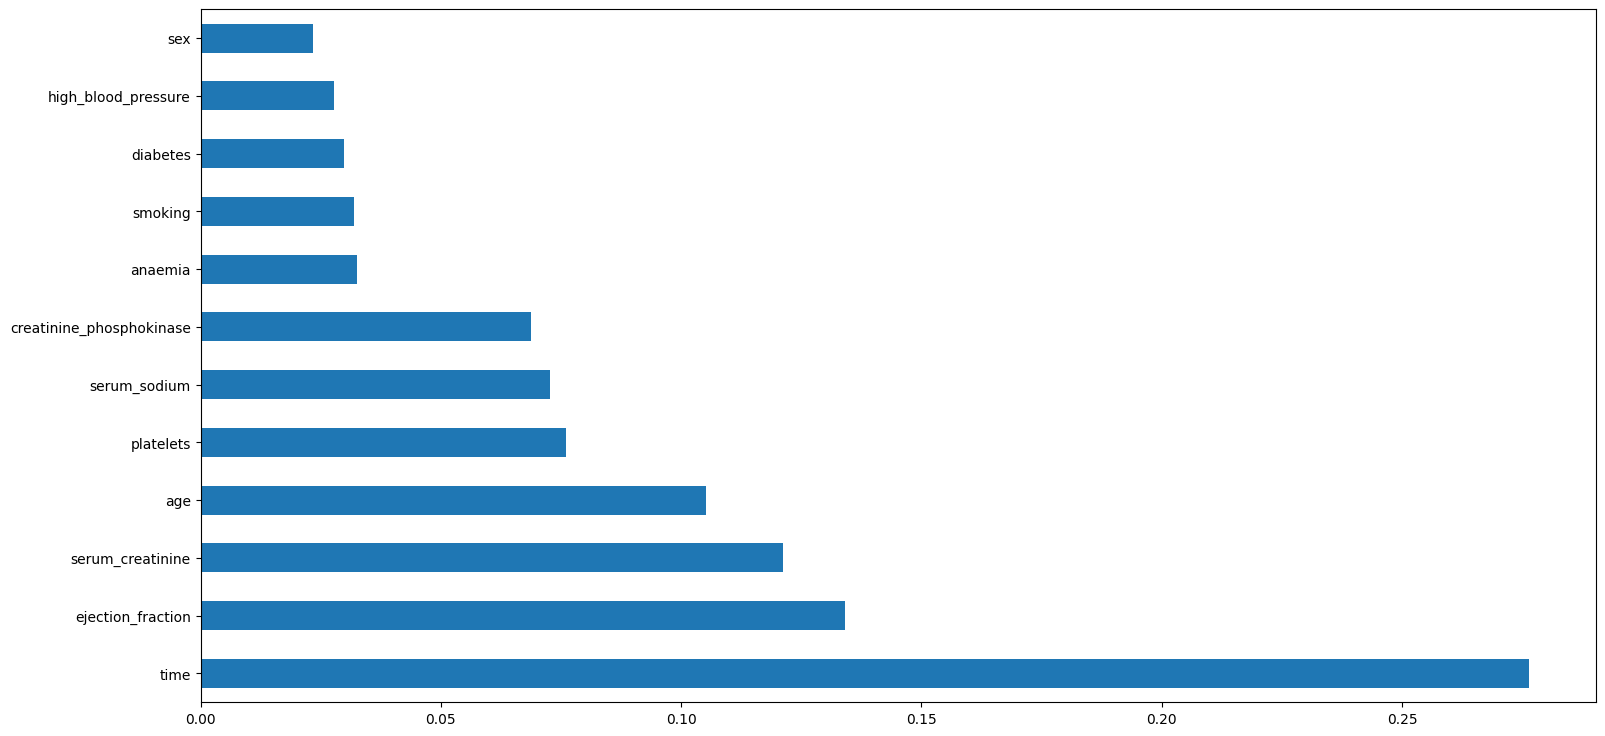

In [ ]:

plt.figure(figsize=(18,9))

x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

The graph shows the feature importances of the variables in the dataset. The feature importance is a measure of how much a variable contributes to the prediction of the target variable. The higher the feature importance, the more important the variable is.

The graph shows that the most important variable is "time", followed by "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "age", "anaemia", "diabetes", "high_blood_pressure", and "smoking".

This suggests that these variables are the most important factors in predicting whether a patient will experience a death event.

It is important to note that the feature importances are relative to each other. This means that a variable with a high feature importance is more important than a variable with a low feature importance, but it does not mean that the variable with a high feature importance is necessarily a good predictor of the target variable.

The feature importances can be used to select the most important variables for a model. This can help to improve the accuracy of the model and reduce the risk of overfitting.

In [ ]:
#we will select time , ejection_fraction and serum_creatline because these are more important or relevant  feature towards the output variable

# Correlation Matrix with Heatmap

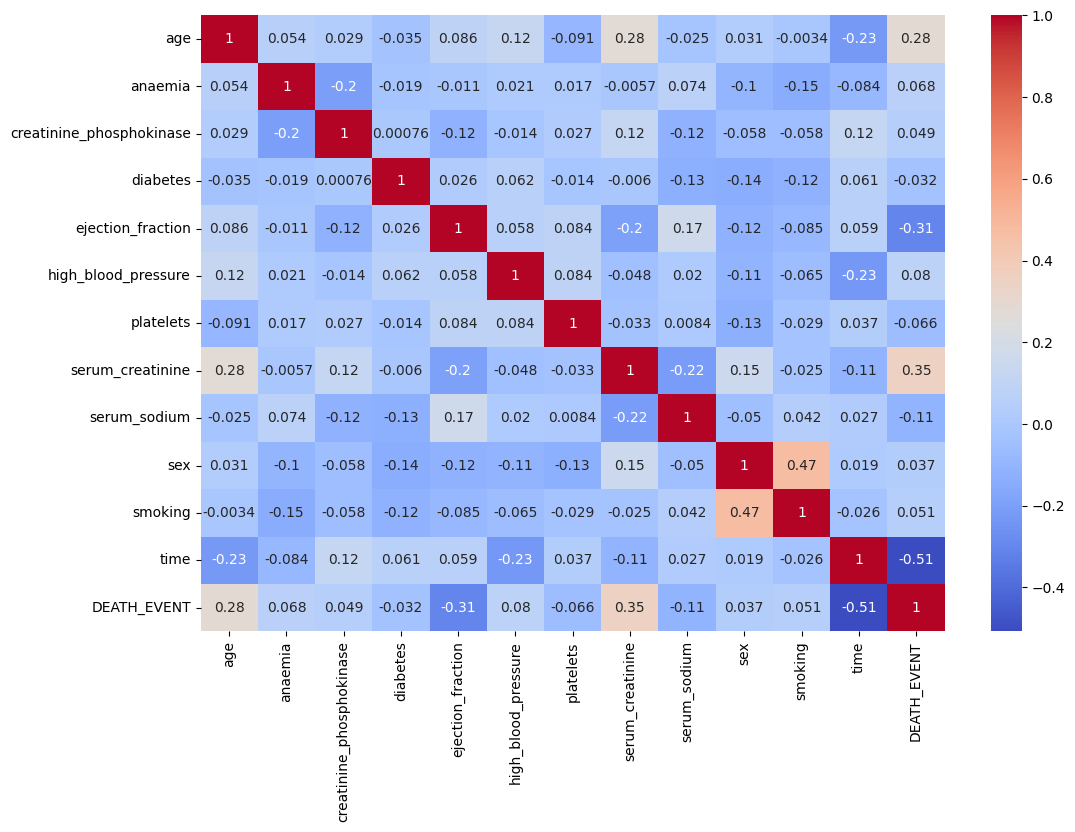

In [ ]:

cor = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

The heatmap shows the correlation between the different variables in the dataset. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 0 indicating no correlation, and 1 indicating a perfect positive correlation.

The heatmap shows that there is a strong positive correlation between ejection_fraction and serum_creatinine, and a strong negative correlation between ejection_fraction and age. This suggests that patients with a higher ejection_fraction are more likely to have a lower serum creatinine level, and patients with a lower ejection_fraction are more likely to be older.

The heatmap also shows that there is a moderate positive correlation between ejection_fraction and time, and a moderate negative correlation between ejection_fraction and platelets. This suggests that patients with a higher ejection_fraction are more likely to have a longer time to death, and patients with a lower ejection_fraction are more likely to have a lower platelet count.


In [ ]:
#from above correlation heatmap we found that :
#death-event have good correlation with - serium_creatinine(0.29) ,and age(0.25)
#age have good correlation with - death-event(0.25) , serium_creatinine(0.16)
cor[abs(cor['DEATH_EVENT']) > 0.1]['DEATH_EVENT']


age                  0.282100
ejection_fraction   -0.305454
serum_creatinine     0.348548
serum_sodium        -0.112804
time                -0.507905
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

<Axes: xlabel='sex', ylabel='creatinine_phosphokinase'>

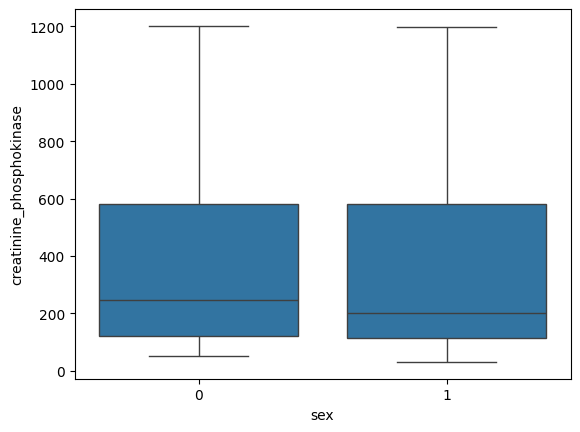

In [ ]:


sns.boxplot(data=df, x = 'sex', y='creatinine_phosphokinase')

The box plot shows the distribution of creatinine phosphokinase (CPK) levels in male and female patients. The median CPK level is higher in males compared to females, indicating that males may have higher levels of muscle damage or injury. The interquartile range (IQR) is also wider in males, suggesting a greater variability in CPK levels among male patients. Additionally, there are more outliers in the male group, indicating that some male patients have extremely high CPK levels. Overall, the box plot suggests that males may be more prone to muscle damage or injury compared to females.

In [ ]:
male = df[df["sex"]==1]
female = df[df["sex"]==0]

male_survi = male[df["DEATH_EVENT"]==0]
male_not = male[df["DEATH_EVENT"]==1]
female_survi = female[df["DEATH_EVENT"]==0]
female_not = female[df["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[df["DEATH_EVENT"]==0]),len(male[df["DEATH_EVENT"]==1]),
         len(female[df["DEATH_EVENT"]==0]),len(female[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

<ipython-input-42-87971a563fc7>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-42-87971a563fc7>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-42-87971a563fc7>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-42-87971a563fc7>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-42-87971a563fc7>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-42-87971a563fc7>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-42-87971a563fc7>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-42-87971a563fc7>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



The pie chart shows the distribution of survival status by gender in the dataset. The majority of both male and female patients survived, with a slightly higher proportion of male survivors (58.4%) compared to female survivors (51.9%). However, the proportion of male patients who died (41.6%) is also higher than the proportion of female patients who died (48.1%). This suggests that while more male patients survived, they also had a higher risk of death compared to female patients. Overall, the graph indicates that gender may be a factor in the risk of death from heart failure, with males having a higher risk than females.

# Data Modeling and Prediction

In [ ]:
#The features 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', and 'time' have a considerable correlation with 'DEATH_EVENT'

from sklearn.model_selection import train_test_split



x = df[['age' , 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y = df['DEATH_EVENT']


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)
y_pred = classifier.predict(x_test)

Decision Tree Confusion Matrix:
[[23  5]
 [ 4 13]]
Decision Tree Accuracy: 0.8
Decision Tree Precision: 0.7222222222222222
Decision Tree Recall: 0.7647058823529411
Decision Tree F1-score: 0.7428571428571428


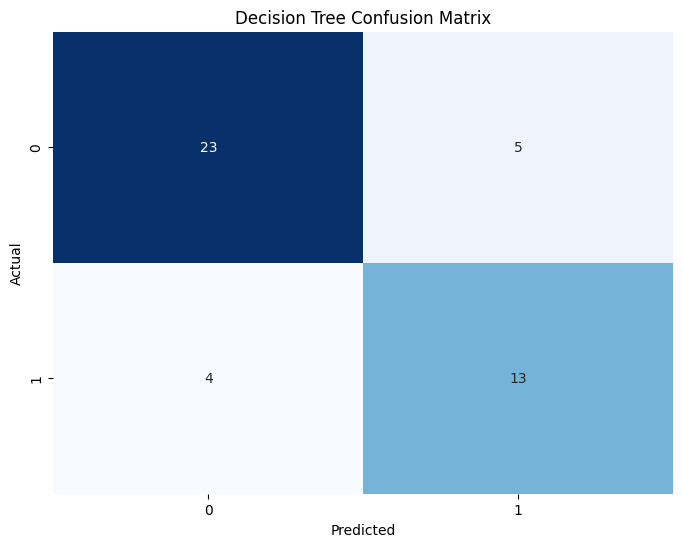

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

clf_decisiontree = DecisionTreeClassifier(random_state=42)
clf_decisiontree.fit(x_train, y_train)
y_pred_decisiontree = clf_decisiontree.predict(x_test)
cm_decisiontree = confusion_matrix(y_test, y_pred_decisiontree)
accuracy_decisiontree = accuracy_score(y_test, y_pred_decisiontree)
precision_decisiontree = precision_score(y_test, y_pred_decisiontree)
recall_decisiontree = recall_score(y_test, y_pred_decisiontree)
f1_decisiontree = f1_score(y_test, y_pred_decisiontree)
print("Decision Tree Confusion Matrix:")
print(cm_decisiontree)
print("Decision Tree Accuracy:", accuracy_decisiontree)
print("Decision Tree Precision:", precision_decisiontree)
print("Decision Tree Recall:", recall_decisiontree)
print("Decision Tree F1-score:", f1_decisiontree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_decisiontree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
classifier.fit(x_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.8222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.76      0.76      0.76        17

    accuracy                           0.82        45
   macro avg       0.81      0.81      0.81        45
weighted avg       0.82      0.82      0.82        45



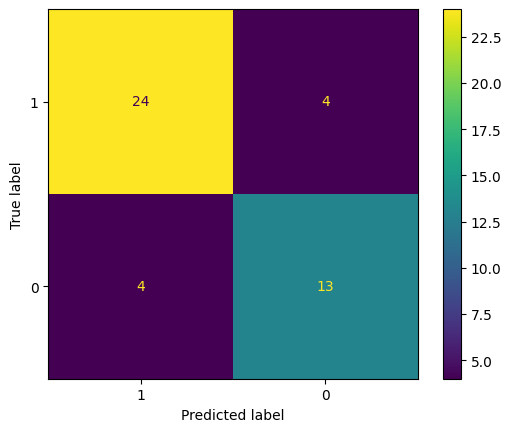

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
classes= df.DEATH_EVENT.unique()
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot()
plt.show()

In [ ]:

classifier = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=0)
classifier.fit(x_train, y_train)

age = int(input("Enter patient's age: "))
ejection_fraction = int(input("Enter patient's ejection fraction: "))
serum_creatinine = float(input("Enter patient's serum creatinine level: "))
serum_sodium = int(input("Enter patient's serum sodium level: "))
time = int(input("Enter the time in days from the onset of symptoms: "))

patient_data = pd.DataFrame([[age, ejection_fraction, serum_creatinine, serum_sodium, time]], columns=['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time'])

prediction = classifier.predict(patient_data)

if prediction == 0:
  print("The patient is predicted to survive.")
else:
  print("The patient is predicted to not survive.")


Enter patient's age: 29
Enter patient's ejection fraction: 122
Enter patient's serum creatinine level: 22
Enter patient's serum sodium level: 1
Enter the time in days from the onset of symptoms: 2
The patient is predicted to not survive.
